# **Hotel Recommender System Using Sentiment Analysis**
A Hotel Recommender System is an advanced approach designed to provide personalized hotel suggestions to users by analyzing and interpreting customer feedback. This system leverages sentiment analysis to evaluate user reviews, extracting insights about the sentiments (positive, negative, or neutral) expressed in the text. By analyzing aspects such as the quality of service, amenities, location, and overall experience, the system can predict user preferences and recommend hotels that align with individual tastes
and requirements. This approach enhances the traditional recommender systems by adding the dimension of emotional context from reviews, leading to more accurate, user-centric recommendations.

# **Dataset Details**
Name: **Hotel Booking Reviews Dataset**

URL: **https://www.kaggle.com/datasets/thedevastator/booking-com-hotel-reviews**

Size: **49.45 MB**

Columns: **16**

Rows: **26,675**


# **Business Questions**


1.   What are the most common factors customers consider when choosing a hotel (e.g., location, price, reviews)?
2.   What are the most popular destinations or cities for hotel bookings in the dataset?
3. Which hotels generate the most revenue and why?
4. What percentage of bookings are canceled, and what patterns can be observed in cancellation behavior?
5. What additional features could improve the effectiveness of the recommender system (e.g., customer reviews, dynamic pricing)?
6. What new amenities or features could be added to attract more customers or improve ratings?


# **Import Relevant Libraries**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [28]:
# Read the uploaded CSV file
df = pd.read_csv('booking_reviews.csv')

# Display the first few rows of the dataframe
df.head()

,index,review_title,reviewed_at,reviewed_by,images,crawled_at,url,hotel_name,hotel_url,avg_rating,nationality,rating,review_text,raw_review_text,tags,meta
0,0,Exceptional,11 July 2021,Kyrylo,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r...","<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
1,1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!,"<p class=""review_pos ""><svg aria-label=""Positi...",Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,"{'language': 'en-gb', 'source': 'https://www.b..."
2,2,Exceptional,3 January 2020,Virginia,NaN,"07/20/2021, 01:09:27",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~Couple~Apartment with Sea View~St...,"{'language': 'en-gb', 'source': 'https://www.b..."
3,3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,NaN,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/villa...,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...,"<p class=""review_pos ""><svg aria-label=""Positi...",Business trip~Solo traveller~Junior Suite~Stay...,"{'language': 'en-gb', 'source': 'https://www.b..."
4,4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,https://cf.bstatic.com/xdata/images/xphoto/squ...,"07/20/2021, 01:09:28",https://www.booking.com/reviews/be/hotel/hydro...,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...,"<p class=""review_neg ""><svg aria-label=""Negati...",Leisure trip~People with friends~Apartment wit...,"{'language': 'en-gb', 'source': 'https://www.b..."


# **Data Transformation**
**Dropping Irrelevant Features/Columns**

In [29]:
df = df.drop(['index', 'images', 'crawled_at', 'url', 'raw_review_text', 'tags', 'meta'], axis = 1)
df.head()

,review_title,reviewed_at,reviewed_by,hotel_name,hotel_url,avg_rating,nationality,rating,review_text
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...


**Renaming Features/Columns**

In [30]:
rename_cols = {'review_title': 'Review Title', 'reviewed_at': 'Reviewed Date', 'reviewed_by': 'Reviewed By',
        'hotel_name': 'Hotel Name', 'hotel_url': 'Hotel URL', 'avg_rating': 'Avg Rating', 'nationality': 'Nationality',
        'rating': 'Rating', 'review_text': 'Review Text'}
df.rename(columns=rename_cols, inplace=True)

**Relevant Features/Columns Datatypes**

In [31]:
df.dtypes

,0
Review Title,object
Reviewed Date,object
Reviewed By,object
Hotel Name,object
Hotel URL,object
Avg Rating,float64
Nationality,object
Rating,float64
Review Text,object


# **Dataset** **Details**

In [32]:
df.shape

(26675, 9)

In [33]:
df.describe()

,Avg Rating,Rating
count,26386.000000,26386.000000
mean,8.449242,8.560669
std,0.716427,1.566554
min,3.800000,1.000000
25%,8.100000,7.900000
50%,8.500000,9.000000
75%,8.900000,10.000000
max,10.000000,10.000000


# **Data Cleaning**

**Removing Duplicate Rows**

In [34]:
duplicate_rows_df = df[df.duplicated()]
print("No Of Duplicate Rows:" , duplicate_rows_df.shape)

No Of Duplicate Rows: (16, 9)


In [35]:
df.count()

,0
Review Title,26674
Reviewed Date,26570
Reviewed By,26570
Hotel Name,26386
Hotel URL,26386
Avg Rating,26386
Nationality,26370
Rating,26386
Review Text,26386


In [36]:
df = df.drop_duplicates()
df.head()

,Review Title,Reviewed Date,Reviewed By,Hotel Name,Hotel URL,Avg Rating,Nationality,Rating,Review Text
0,Exceptional,11 July 2021,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Poland,10.0,"Everything was perfect! Quite, cozy place to r..."
1,I highly recommend this b&b! We enjoyed it a lot!,24 November 2019,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Belgium,9.0,Very friendly host and perfect breakfast!
2,Exceptional,3 January 2020,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,United Kingdom,10.0,It was just what we wanted for a week by the b...
3,My stay in the house was a experiencing bliss ...,8 September 2019,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.7,Netherlands,10.0,My stay in the house was a experiencing bliss ...
4,One bedroom apartment with wonderful view and ...,23 June 2019,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,South Africa,9.2,The building itself has a very musty smell in ...


In [37]:
df.count()

,0
Review Title,26658
Reviewed Date,26554
Reviewed By,26554
Hotel Name,26370
Hotel URL,26370
Avg Rating,26370
Nationality,26354
Rating,26370
Review Text,26370


**Identifying Null values and removing them from the dataset**

In [38]:
print(df.isnull().sum())

Review Title       1
Reviewed Date    105
Reviewed By      105
Hotel Name       289
Hotel URL        289
Avg Rating       289
Nationality      305
Rating           289
Review Text      289
dtype: int64


In [39]:
df=df.dropna()
df.count()

,0
Review Title,26353
Reviewed Date,26353
Reviewed By,26353
Hotel Name,26353
Hotel URL,26353
Avg Rating,26353
Nationality,26353
Rating,26353
Review Text,26353


In [40]:
print(df.isnull().sum())

Review Title     0
Reviewed Date    0
Reviewed By      0
Hotel Name       0
Hotel URL        0
Avg Rating       0
Nationality      0
Rating           0
Review Text      0
dtype: int64


# **Data Visualization**

**Below Box Plot shows the rating frame which users are reviewing for the hotels**

<Axes: xlabel='Rating'>

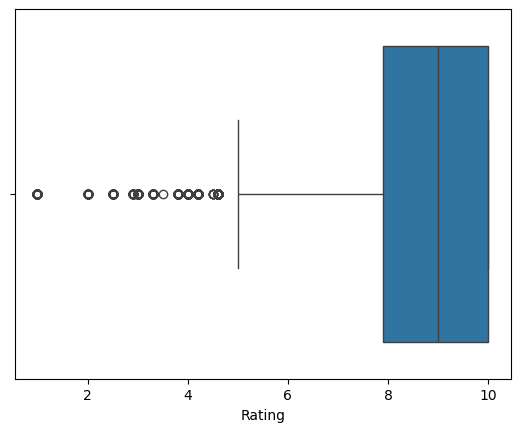

In [41]:
sns.boxplot(x=df["Rating"])

**Below Bar Chart gives the answer to our Business Question 2 that shows the popular destination which is to "Motel One Brussels"** and also might answer the Business Question 3 about which hotel generates the highest revenue

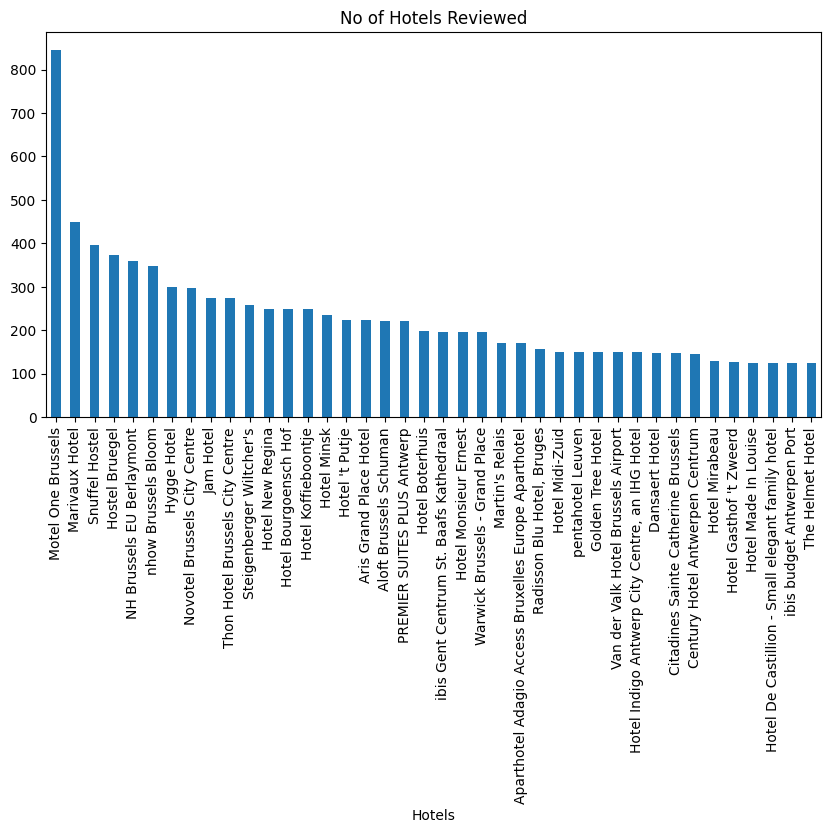

In [42]:
df['Hotel Name'].value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title("No of Hotels Reviewed")
plt.xlabel('Hotels')
plt.show()

Data Transformation to give Average Rating for each **Hotel** **bold text**

In [43]:
hotel_avg_rating = {}
for index, row in df.iterrows():
    hotel_avg_rating[row['Hotel Name']] = row['Avg Rating']

print(hotel_avg_rating)

{'Villa Pura Vida': 9.7, 'Hydro Palace Apartment': 9.2, 'Love Nest Versailles - Unique Louis XIV decoration - Calm location right IN city center': 8.8, 'Gite Namaste': 9.3, 'Hotel Saint Sauveur by WP Hotels': 7.8, 'B&B Hof Beygaert': 9.5, 'Novotel Gent Centrum': 8.4, 'B&B Place Jourdan': 9.1, 'Marivaux Hotel': 8.5, 'Hotel Astoria Gent': 8.5, 'AppartHotel Belle Vue': 7.9, 'Le Studio de Christine': 8.2, 'Guest house Heysel Laeken Atomium': 7.7, "la heid d'ehan": 8.1, 'Vintage Chalet in Sougne-Remouchamps near Forest': 9.2, 'Minimalistic In Premium Location': 9.2, 'Pegasus Studioflats Brussels City Aparthotel': 8.8, 'Liège Center Sakura': 8.9, 'Antwerp Harbour Hotel': 7.6, 'Cottage Moere': 9.4, 'Le Gîte Du Prieuré': 9.5, 'Villa Anna': 9.2, 'B&B The View Bis': 9.8, 'Hotel Au Prince Royal': 8.1, 'B&B Bij MoeMee': 9.5, 'B&B CHEZ PIERROT ALIAS IKEJIME': 7.8, 'B&B La maison de Fille': 9.3, 'Ter Zwaanhoek': 9.2, 'ibis Hotel Brussels Airport': 7.1, "Bed 'n Blues ****": 9.7, 'Complex Comfort': 9.

In [44]:
dict_hotels_avg_rating = {'Hotel Name': list(hotel_avg_rating.keys()),'Rating': list(hotel_avg_rating.values())}
df_hotels_avg_rating = pd.DataFrame.from_dict(dict_hotels_avg_rating)
df_hotels_avg_rating

,Hotel Name,Rating
0,Villa Pura Vida,9.7
1,Hydro Palace Apartment,9.2
2,Love Nest Versailles - Unique Louis XIV decora...,8.8
3,Gite Namaste,9.3
4,Hotel Saint Sauveur by WP Hotels,7.8
...,...,...
814,Smartflats City - Royal,7.6
815,Glamping op het Zeugekot,8.6
816,Hotel Bilderdijk,9.0
817,B&B Roosendaelhof,8.3


**The Below Bar Chart gives us the Average Rating for each Hotel**

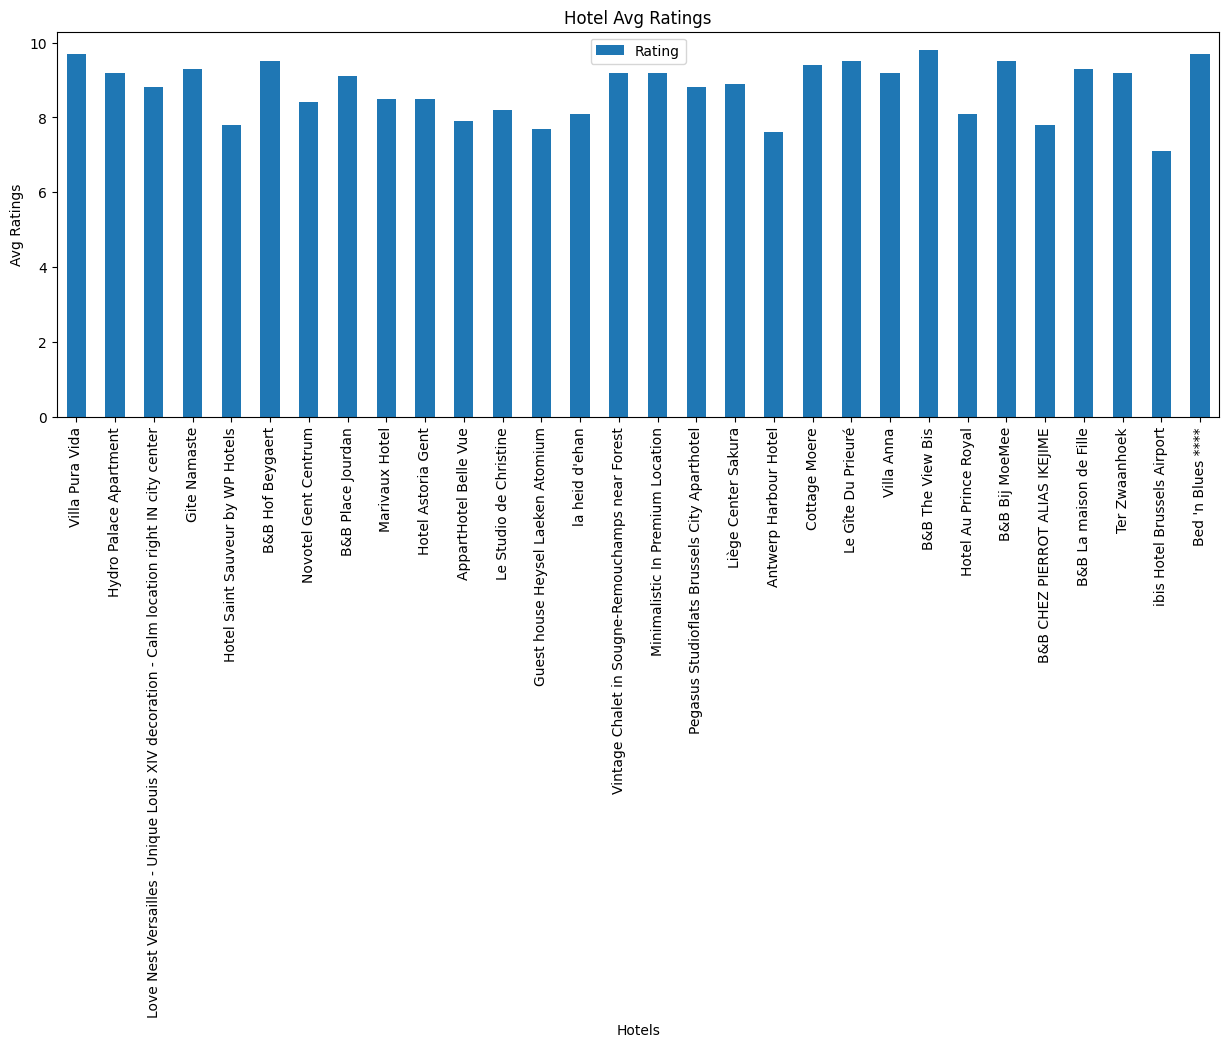

In [45]:
df_subset = df_hotels_avg_rating.head(30)
df_subset.plot(x='Hotel Name', y='Rating', kind='bar', figsize=(15, 5))
plt.title("Hotel Avg Ratings")
plt.xlabel('Hotels')
plt.ylabel('Avg Ratings')
plt.show()

# **Modeling**

In [46]:
X = df.drop(['Review Title', 'Reviewed Date', 'Reviewed By', 'Hotel Name', 'Hotel URL', 'Nationality', 'Review Text'], axis = 1)
Y = df["Hotel Name"]

**Trainig and Testing of the Dataset**

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**We have applied KNN Model for the prediction of Hotels**

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)

In [49]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.13
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
                                                                                          precision    recall  f1-score   support

                                                                        " Chimay B & B "       0.00      0.00      0.00         5
                                          "En Aqualye" chambre privative chez l'habitant       0.00      0.00      0.00         2
                                                                         "Ter Ename n°2"       0.00      0.00      0.00         1
                                                                 'S Hertogenmolens Hotel       0.00      0.00      0.00         5
                                                                              't Eenvoud       0.00      0.00      0.00         1
                                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

**Predicted Hotel Name using Rating and Avg Rating**

In [50]:
input_data = [[9, 10]]
prediction = knn_model.predict(input_data)
print(f"Predicted Hotel: {prediction[0]}")

Predicted Hotel: Hotel Bon Accueil


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
